# Project 2 - Ames Housing Data and Kaggle Challenge

**Imports:**

In [1]:
import pandas as pd
#https://datascienceparichay.com/article/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics 

**Functions:**

In [2]:
def regress_metrics(y_test, y_preds, samp_size):#, ind_var):
    
    MAE = metrics.mean_absolute_error(y_test, y_preds)
    
    SSE = np.sum((y_test - y_preds) ** 2)
    
    MSE = metrics.mean_squared_error(y_test, y_preds)
    
    RMSE = np.sqrt(MSE)
    
    r2 = metrics.r2_score(y_test, y_preds)
    
    #r2adj = r2_adj(samp_size, ind_var) 
    
    return [{'MAE' : MAE,
            'SSE' : SSE, 
            'MSE' : MSE, 
            'RMSE' : RMSE,
            'r2' : r2}]
            #'r2_adj' : r2adj}]

**Reading in the Data:**

In [3]:
#reading in training and testing data
ames_df = pd.read_csv('./datasets/train.csv')
ames_test_df = pd.read_csv('./datasets/test.csv')

In [4]:
#getting an idea of the shape and columns in next four codelines:
ames_df.shape

(2051, 81)

In [5]:
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
ames_test_df.shape

(878, 80)

In [7]:
ames_test_df.head()

#ames_test_df is missing the 'SalePrice' column

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
#listing all columns for ames_df: 
ames_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
ames_df.isna().sum().sort_values(ascending = False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
SalePrice          0
Length: 81, dtype: int64

In [10]:
#renaming columns to preferred nomenclature 
ames_df.columns = ames_df.columns.str.strip().str.lower()
ames_df.columns = ames_df.columns.str.replace(' ', '_')
ames_df.columns[:5]

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')

In [11]:
#doing the same thing to our testing data:
ames_test_df.columns = ames_test_df.columns.str.strip().str.lower()
ames_test_df.columns = ames_test_df.columns.str.replace(' ', '_')
ames_test_df.columns[:5]

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')

In [12]:
#null/baseline model: 
round(ames_df['saleprice'].mean(), 2) 
#The average cost of a home in Ames is $181469.70. 

181469.7

In [13]:
round(ames_df['saleprice'].median(), 2) 
#The median cost of a home in Ames is $162500.00. 
#This was used as the original baseline submission in Kaggle.

162500.0

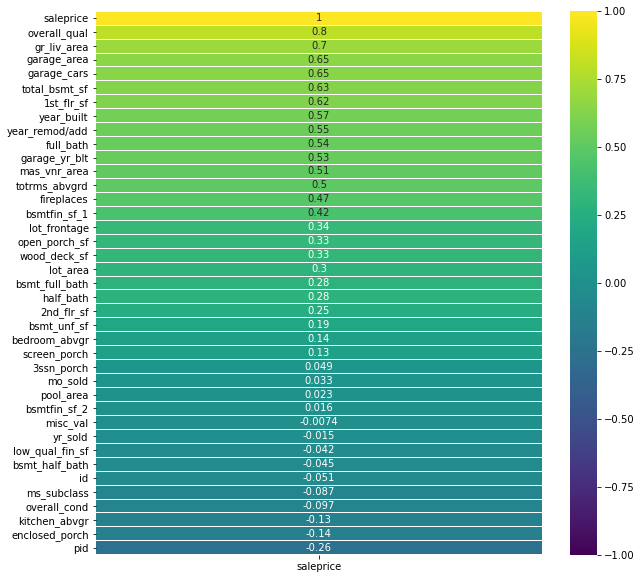

In [14]:
#considering the corr. between Sale Price and all features
plt.figure(figsize=(10,10))
sns.heatmap(ames_df.corr()[['saleprice']].sort_values('saleprice', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            linewidths = .01,
            cmap='viridis');

- I am going to consider the features with a positive corr. above 0.2

**What features to consider?**

In [15]:
#Unlike my previous two notebooks regarding Project_2, where I picked my features from my domain knowledge,
#I'm going to used the features with a positive correlation above 0.2 in the correlation headmap for price. 

features = ['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars',
            'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
            'full_bath', 'garage_yr_blt', 'mas_vnr_area', 'totrms_abvgrd', 
            'fireplaces', 'bsmtfin_sf_1', 'lot_frontage', 'open_porch_sf',
            'wood_deck_sf', 'lot_area', 'bsmt_full_bath', 'half_bath', 
            '2nd_flr_sf']

features_df = ames_df[features]
features_df.head(3)

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,garage_yr_blt,mas_vnr_area,totrms_abvgrd,fireplaces,bsmtfin_sf_1,lot_frontage,open_porch_sf,wood_deck_sf,lot_area,bsmt_full_bath,half_bath,2nd_flr_sf
0,6,1479,475.0,2.0,725.0,725,1976,2005,2,1976.0,289.0,6,0,533.0,NaN,44,0,13517,0.0,1,754
1,7,2122,559.0,2.0,913.0,913,1996,1997,2,1997.0,132.0,8,1,637.0,43.0,74,0,11492,1.0,1,1209
2,5,1057,246.0,1.0,1057.0,1057,1953,2007,1,1953.0,0.0,5,0,731.0,68.0,52,0,7922,1.0,0,0


**Data Cleaning & EDA**

In [16]:
features_df = features_df.join(ames_df['saleprice'])

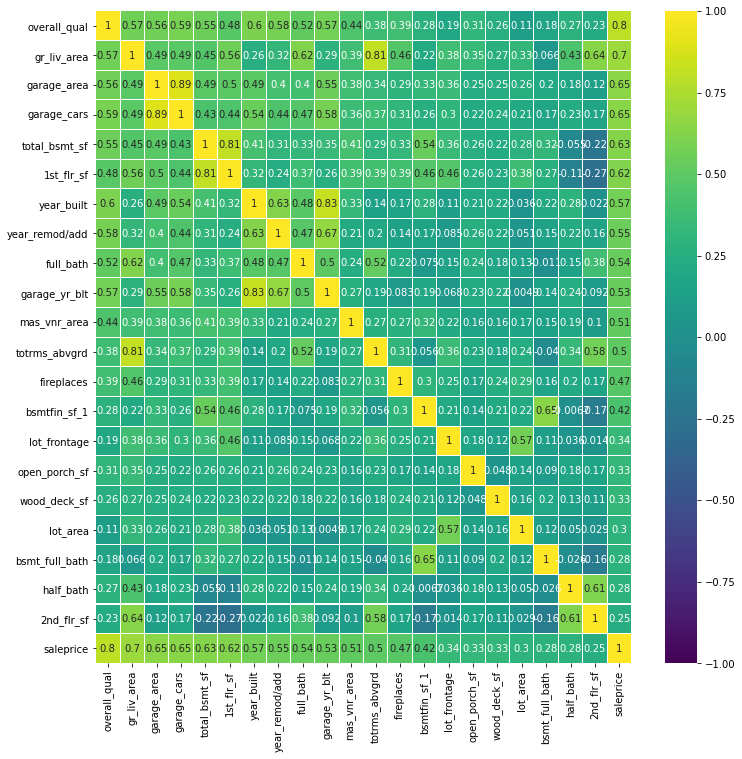

In [17]:
#corr. between all features:
plt.figure(figsize = (12,12))
sns.heatmap(features_df.corr(),
            annot = True,
            linewidth = .01,
            vmin = -1,
            vmax = 1,
            cmap = 'viridis');

- NEED TO INTERPRET HEAT MAP HERE

In [18]:
#getting a general idea of null counts
features_df.isna().sum().sort_values(ascending = False)

lot_frontage      330
garage_yr_blt     114
mas_vnr_area       22
bsmt_full_bath      2
garage_area         1
garage_cars         1
total_bsmt_sf       1
bsmtfin_sf_1        1
overall_qual        0
2nd_flr_sf          0
half_bath           0
lot_area            0
wood_deck_sf        0
open_porch_sf       0
totrms_abvgrd       0
fireplaces          0
gr_liv_area         0
full_bath           0
year_remod/add      0
year_built          0
1st_flr_sf          0
saleprice           0
dtype: int64

In [19]:
#looking at data types:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall_qual    2051 non-null   int64  
 1   gr_liv_area     2051 non-null   int64  
 2   garage_area     2050 non-null   float64
 3   garage_cars     2050 non-null   float64
 4   total_bsmt_sf   2050 non-null   float64
 5   1st_flr_sf      2051 non-null   int64  
 6   year_built      2051 non-null   int64  
 7   year_remod/add  2051 non-null   int64  
 8   full_bath       2051 non-null   int64  
 9   garage_yr_blt   1937 non-null   float64
 10  mas_vnr_area    2029 non-null   float64
 11  totrms_abvgrd   2051 non-null   int64  
 12  fireplaces      2051 non-null   int64  
 13  bsmtfin_sf_1    2050 non-null   float64
 14  lot_frontage    1721 non-null   float64
 15  open_porch_sf   2051 non-null   int64  
 16  wood_deck_sf    2051 non-null   int64  
 17  lot_area        2051 non-null   i

In [20]:
#locating lot_frontage entries with null values
features_df.loc[(features_df['lot_frontage'].isna())].head(3)

#LotFrontage: Linear feet of street connected to property, 
#so the NAs represent no linear feet of street connexted to the property

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,garage_yr_blt,mas_vnr_area,totrms_abvgrd,fireplaces,bsmtfin_sf_1,lot_frontage,open_porch_sf,wood_deck_sf,lot_area,bsmt_full_bath,half_bath,2nd_flr_sf,saleprice
0,6,1479,475.0,2.0,725.0,725,1976,2005,2,1976.0,289.0,6,0,533.0,NaN,44,0,13517,0.0,1,754,130500
7,5,1188,531.0,2.0,1188.0,1188,1959,1959,1,1959.0,180.0,6,0,1000.0,NaN,0,0,12160,1.0,0,0,142000
8,5,924,420.0,1.0,924.0,924,1952,1952,1,1952.0,0.0,6,0,292.0,NaN,324,0,15783,0.0,0,0,112500


In [21]:
#the null entries in 'garage_yr_blt' can also be zero:
features_df.loc[(features_df['garage_yr_blt'].isna())].head(3)

#GarageYrBlt: Year garage was built, the NAs represent no garages, 
#as indicated by 0 for both 'garage_area' and 'garage_cars'

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,garage_yr_blt,mas_vnr_area,totrms_abvgrd,fireplaces,bsmtfin_sf_1,lot_frontage,open_porch_sf,wood_deck_sf,lot_area,bsmt_full_bath,half_bath,2nd_flr_sf,saleprice
28,5,1991,0.0,0.0,957.0,1034,1895,2006,2,NaN,0.0,9,0,0.0,75.0,0,0,8250,0.0,0,957,119600
53,4,1092,0.0,0.0,546.0,546,1970,1970,1,NaN,0.0,5,0,176.0,21.0,26,200,1476,0.0,1,546,76000
65,5,1120,0.0,0.0,1120.0,1120,2007,2007,1,NaN,0.0,6,0,206.0,70.0,30,0,8402,0.0,0,0,147000


In [22]:
#the null entries in 'mas_vnr_area' can also be zero:
features_df.loc[(features_df['mas_vnr_area'].isna())].head(3)

#MasVnrArea: Masonry veneer area in square feet, the NAs represent
#that's there no masonry veneer. 

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,garage_yr_blt,mas_vnr_area,totrms_abvgrd,fireplaces,bsmtfin_sf_1,lot_frontage,open_porch_sf,wood_deck_sf,lot_area,bsmt_full_bath,half_bath,2nd_flr_sf,saleprice
22,8,2253,575.0,2.0,1209.0,1209,2005,2006,2,2005.0,NaN,8,1,0.0,103.0,142,243,12867,0.0,1,1044,344133
41,10,2076,850.0,3.0,2076.0,2076,2006,2006,2,2006.0,NaN,7,1,1386.0,107.0,229,216,13891,1.0,1,0,465000
86,7,1200,555.0,2.0,1176.0,1200,2003,2003,2,2003.0,NaN,5,0,833.0,67.0,41,0,10083,1.0,0,0,184900


In [23]:
#the null entries in 'bsmt_full_bath' can also be zero:
features_df.loc[(features_df['bsmt_full_bath'].isna())]

#BsmtFullBath: Basement full bathrooms, the NAs represent
#that's there no bathrooms in the basement (or no basement to begin with). 

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,garage_yr_blt,mas_vnr_area,totrms_abvgrd,fireplaces,bsmtfin_sf_1,lot_frontage,open_porch_sf,wood_deck_sf,lot_area,bsmt_full_bath,half_bath,2nd_flr_sf,saleprice
616,5,3820,624.0,2.0,0.0,3820,1959,1996,3,1959.0,0.0,11,2,0.0,123.0,372,0,47007,NaN,1,0,284700
1327,4,896,280.0,1.0,NaN,896,1946,1950,1,1946.0,0.0,4,0,NaN,99.0,0,0,5940,NaN,0,0,79000


In [24]:
#none of my variables in this list of features is an object,
#I only need to worry about the null values.

In [25]:
features_df.columns

Index(['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'full_bath', 'garage_yr_blt', 'mas_vnr_area', 'totrms_abvgrd',
       'fireplaces', 'bsmtfin_sf_1', 'lot_frontage', 'open_porch_sf',
       'wood_deck_sf', 'lot_area', 'bsmt_full_bath', 'half_bath', '2nd_flr_sf',
       'saleprice'],
      dtype='object')

In [26]:
#establishing base age for year_built/'remod/add':
ames_df['year_built'].max()

2010

In [27]:
def pipeline(df):

    #Grabbing the columns for transformation
    feats = ['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'full_bath', 'garage_yr_blt', 'mas_vnr_area', 'totrms_abvgrd',
       'fireplaces', 'bsmtfin_sf_1', 'lot_frontage', 'open_porch_sf',
       'wood_deck_sf', 'lot_area', 'bsmt_full_bath', 'half_bath', 
       '2nd_flr_sf']
    
    X = df[feats]
    
    #filling missing values with '0'
    X.fillna(0, inplace = True)

    #extrapolating age from dataset, base max year built houses (2010):
    X['year_built']     = 2010 - X['year_built']
    X['year_remod/add'] = 2010 - X['year_remod/add']

    #getting dummies:
    X = pd.get_dummies(X, columns = ['full_bath'], drop_first = True)

    #any feature interactions go here: 
    X['total_sf_dom'] = X['gr_liv_area'] + X['bsmtfin_sf_1']
    X['lot_minus_total'] = X['lot_area'] - X['total_sf_dom']

    return X

In [28]:
features_df = pipeline(features_df)
features_df.head(3)

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-27-3bc9b9d40128>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year_built']     = 2010 - X['year_built']
<ipython-input-27-3bc9b9d40128>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,garage_yr_blt,mas_vnr_area,totrms_abvgrd,fireplaces,bsmtfin_sf_1,lot_frontage,open_porch_sf,wood_deck_sf,lot_area,bsmt_full_bath,half_bath,2nd_flr_sf,full_bath_1,full_bath_2,full_bath_3,full_bath_4,total_sf_dom,lot_minus_total
0,6,1479,475.0,2.0,725.0,725,34,5,1976.0,289.0,6,0,533.0,0.0,44,0,13517,0.0,1,754,0,1,0,0,2012.0,11505.0
1,7,2122,559.0,2.0,913.0,913,14,13,1997.0,132.0,8,1,637.0,43.0,74,0,11492,1.0,1,1209,0,1,0,0,2759.0,8733.0
2,5,1057,246.0,1.0,1057.0,1057,57,3,1953.0,0.0,5,0,731.0,68.0,52,0,7922,1.0,0,0,1,0,0,0,1788.0,6134.0


In [29]:
features_df = features_df.join(ames_df['saleprice'])

In [30]:
features_df.to_csv('./datasets/final_features_df.csv')

In [31]:
features_df.shape

(2051, 27)

In [32]:
#putting our testing data through the pipeline
kaggle_test_df = pipeline(ames_test_df)
kaggle_test_df.head(3)

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-27-3bc9b9d40128>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year_built']     = 2010 - X['year_built']
<ipython-input-27-3bc9b9d40128>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,garage_yr_blt,mas_vnr_area,totrms_abvgrd,fireplaces,bsmtfin_sf_1,lot_frontage,open_porch_sf,wood_deck_sf,lot_area,bsmt_full_bath,half_bath,2nd_flr_sf,full_bath_1,full_bath_2,full_bath_3,full_bath_4,total_sf_dom,lot_minus_total
0,6,1928,440,1,1020,908,100,60,1910.0,0.0,9,0,0,69.0,60,0,9142,0,0,1020,0,1,0,0,1928,7214
1,5,1967,580,2,1967,1967,33,33,1977.0,0.0,10,0,0,0.0,0,170,9662,0,0,0,0,1,0,0,1967,7695
2,7,1496,426,2,654,664,4,4,2006.0,0.0,7,1,554,58.0,24,100,17104,1,1,832,0,1,0,0,2050,15054


**Modeling Time! Let's Work It!**

In [33]:
features_df.columns

Index(['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'garage_yr_blt', 'mas_vnr_area', 'totrms_abvgrd', 'fireplaces',
       'bsmtfin_sf_1', 'lot_frontage', 'open_porch_sf', 'wood_deck_sf',
       'lot_area', 'bsmt_full_bath', 'half_bath', '2nd_flr_sf', 'full_bath_1',
       'full_bath_2', 'full_bath_3', 'full_bath_4', 'total_sf_dom',
       'lot_minus_total', 'saleprice'],
      dtype='object')

In [34]:
features = ['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'garage_yr_blt', 'mas_vnr_area', 'totrms_abvgrd', 'bsmtfin_sf_1',
       'lot_frontage', 'open_porch_sf', 'wood_deck_sf', 'lot_area',
       'bsmt_full_bath', 'half_bath', '2nd_flr_sf', 'full_bath_1',
       'full_bath_2', 'full_bath_3', 'full_bath_4', 'total_sf_dom', 'lot_minus_total']

X = features_df[features]
y = features_df['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
#calling in Linear Regression model:

lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)
lr_1.score(X_train, y_train), lr_1.score(X_test, y_test)

(0.8042944925132878, 0.8530692447822859)

In [36]:
lr_1.score(X_test, y_test) - lr_1.score(X_train, y_train)

0.04877475226899808

In [37]:
#Lasso:
lasso = LassoCV()
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.7281410788395579, 0.7885271116640165)

In [38]:
lasso.score(X_test, y_test) - lasso.score(X_train, y_train)

0.060386032824458535

In [39]:
#Ridge:
ridge = RidgeCV(alphas = np.linspace(.1, 10, 100))
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.8040597692947289, 0.8518886822307699)

In [40]:
ridge.score(X_test, y_test) - ridge.score(X_train, y_train)

0.04782891293604097

In [41]:
lr_features = pd.DataFrame(X_train.columns, columns = ['feature'])
lr_features['abs_coef'] = np.abs(lr_1.coef_)
lr_features.sort_values(by='abs_coef', ascending = False).head(10)

,feature,abs_coef
22,full_bath_4,43109.531540
0,overall_qual,20896.545233
21,full_bath_3,16335.543889
3,garage_cars,13446.071913
20,full_bath_2,11639.810411
16,bsmt_full_bath,8240.969504
19,full_bath_1,4300.143601
17,half_bath,2446.718424
10,totrms_abvgrd,592.554348
7,year_remod/add,296.291554


In [42]:
#adding on the sale price from training data
ames_test_df = ames_test_df.join(ames_df['saleprice'])

In [43]:
kaggle_preds = lr_1.predict(kaggle_test_df[features])
kaggle_preds.shape

(878,)

In [44]:
print('Average Expected Housing Price:', kaggle_preds.mean())

Average Expected Housing Price: 178834.2035181281


**Getting Data Ready for Kaggle Submission:**

In [45]:
ames_test_df['saleprice'] = kaggle_preds

In [46]:
ames_test_df.rename(columns={'id':'Id'}, inplace=True)

In [47]:
final_features_submission = ames_test_df[['Id', 'saleprice']]
final_features_submission.head()

,Id,saleprice
0,2658,143727.823691
1,2718,173894.776457
2,2414,213814.128217
3,1989,122487.679719
4,625,179702.010513


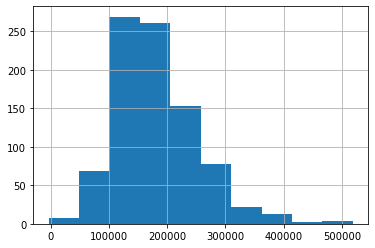

In [49]:
final_features_submission['saleprice'].hist();

In [50]:
final_features_submission.set_index('Id', inplace = True)
final_features_submission.to_csv('./submissions/first_sub_lr_final_feat.csv')

**Kaggle Score**

- My final submission of a model based on Linear Regression, no scaling, resulted in a Kaggle score of 29308.84914